# Import necessary libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# Mysql connection
import pymysql #for getting data from a sql database
from sqlalchemy import create_engine #for establishing the connection and authentication
from getpass import getpass  # To get the password without showing the input

# Hypothesis testing
import scipy.stats
from scipy.stats import ttest_1samp

# Sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample # Oversampling

import matplotlib.pyplot as plt

# Max columns_rows
pd.set_option('display.max_columns', 165)
pd.set_option('display.max_rows', 165)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Get Data

In [2]:
data = pd.read_csv('sales.csv')

In [3]:
data

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


# Exploratory Data Analysis

In [4]:
data.shape

(640840, 10)

In [5]:
data.isna().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [6]:
data = data.drop(['Unnamed: 0'], axis=1)

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [8]:
data

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,0,4553
640836,97,1,2014-04-14,987,1,1,0,0,12307
640837,987,1,2014-07-07,925,1,0,0,0,6800
640838,1084,4,2014-06-12,725,1,0,0,0,5344


In [9]:
data['state_holiday'].value_counts()

0    621160
a     12842
b      4214
c      2624
Name: state_holiday, dtype: int64

In [10]:
data['school_holiday'].value_counts()

0    526468
1    114372
Name: school_holiday, dtype: int64

In [11]:
data['open'].value_counts()

1    532016
0    108824
Name: open, dtype: int64

In [12]:
data['day_of_week'].dtypes

dtype('int64')

In [13]:
data['promotion'].value_counts()

0    396220
1    244620
Name: promotion, dtype: int64

In [14]:
data.dtypes

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object

In [15]:
# closed = data[data['open']==0] # sales are zero when the shops are closed.
# closed

In [16]:
# data = data[data['open']==1] # we keep with data for which sales are open. 
# data

# Check for multicollinearity

In [17]:
corr_matrix=data.corr()
corr_matrix

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
store_ID,1.000000,0.000329,0.023605,-0.001108,-0.000364,-0.000706,0.004804
day_of_week,0.000329,1.000000,-0.385616,-0.527947,-0.392736,-0.206069,-0.461107
nb_customers_on_day,0.023605,-0.385616,1.000000,0.617264,0.315858,0.071085,0.894872
open,-0.001108,-0.527947,0.617264,1.000000,0.294936,0.085213,0.678463
promotion,-0.000364,-0.392736,0.315858,0.294936,1.000000,0.066565,0.451819
school_holiday,-0.000706,-0.206069,0.071085,0.085213,0.066565,1.000000,0.084484
sales,0.004804,-0.461107,0.894872,0.678463,0.451819,0.084484,1.000000


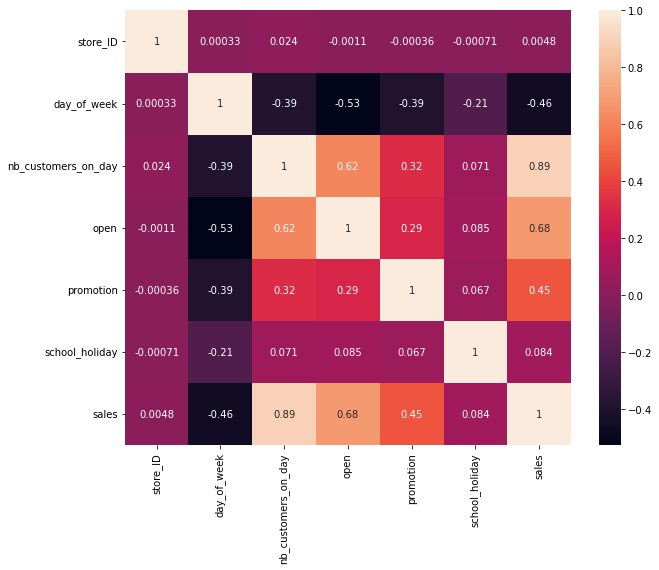

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
data = data.drop(['open','store_ID'], axis=1) # unnecessary columns

In [20]:
data['day_of_week'] = data['day_of_week'].astype('object')

In [21]:
data['day_of_week'].dtypes

dtype('O')

In [22]:
data['month'] = data['date'].dt.month

In [23]:
data['month'].dtypes

dtype('int64')

In [24]:
data['month'] = data['month'].astype('object')

In [25]:
data['month'].dtypes

dtype('O')

In [26]:
data.dtypes

day_of_week                    object
date                   datetime64[ns]
nb_customers_on_day             int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
month                          object
dtype: object

In [27]:
data['school_holiday'] = data['school_holiday'].astype('object')

In [28]:
data['promotion'] = data['promotion'].astype('object')

In [29]:
corr_matrix=data.corr()   # default
corr_matrix

,nb_customers_on_day,sales
nb_customers_on_day,1.000000,0.894872
sales,0.894872,1.000000


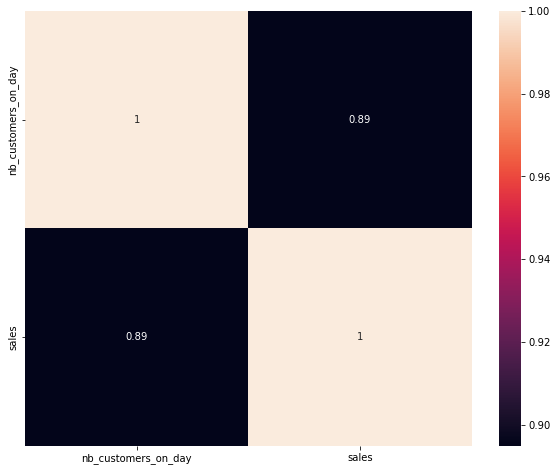

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

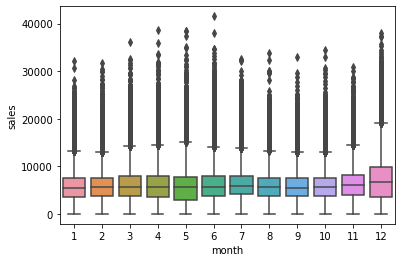

In [31]:
sns.boxplot(x = "month",y="sales",data=data)
plt.show()

In [32]:
data['year'] = data['date'].dt.year

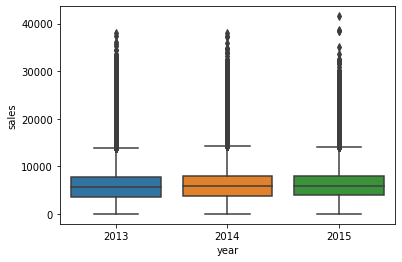

In [33]:
sns.boxplot(x = "year",y="sales",data=data)
plt.show()

In [34]:
# Each year has almost same sales. Therefore, year column is dropped.

In [35]:
data = data.drop(['year'], axis=1)

In [36]:
data.dtypes

day_of_week                    object
date                   datetime64[ns]
nb_customers_on_day             int64
promotion                      object
state_holiday                  object
school_holiday                 object
sales                           int64
month                          object
dtype: object

# Train/Test/Split data

## X-y Split

In [37]:
X = data.drop('sales', axis=1)
y = data['sales']

In [38]:
X.isna().sum()

day_of_week            0
date                   0
nb_customers_on_day    0
promotion              0
state_holiday          0
school_holiday         0
month                  0
dtype: int64

## Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (512672, 7)
X_test shape:  (128168, 7)
y_train shape:  (512672,)
y_test shape:  (128168,)


## Break into Numerical and Categorical

In [40]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [41]:
X_train_num.head()

,nb_customers_on_day
464750,1170
621225,716
161309,0
526452,1032
373822,0


# MinMax Scaler

In [42]:
transformer = MinMaxScaler().fit(X_train_num)

In [43]:
X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1,columns=X_train_num.columns)
X_train_scale.head()

,nb_customers_on_day
0,0.214364
1,0.131184
2,0.000000
3,0.189080
4,0.000000


In [44]:
X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2,columns=X_test_num.columns)
X_test_scale.head()

,nb_customers_on_day
0,0.231770
1,0.194943
2,0.286185
3,0.102968
4,0.095090


# Onehotencoding

In [45]:
X_train_cat.head(5)

,day_of_week,promotion,state_holiday,school_holiday,month
464750,5,0,0,0,2
621225,6,0,0,0,9
161309,7,0,0,0,12
526452,2,1,0,1,7
373822,7,0,0,0,9


In [46]:
X_train_cat.dtypes

day_of_week       object
promotion         object
state_holiday     object
school_holiday    object
month             object
dtype: object

In [47]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512672 entries, 464750 to 491858
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   day_of_week     512672 non-null  object
 1   promotion       512672 non-null  object
 2   state_holiday   512672 non-null  object
 3   school_holiday  512672 non-null  object
 4   month           512672 non-null  object
dtypes: object(5)
memory usage: 23.5+ MB


In [48]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,promotion_1,state_holiday_a,state_holiday_b,state_holiday_c,school_holiday_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,promotion_1,state_holiday_a,state_holiday_b,state_holiday_c,school_holiday_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Concat scaled numericals and encoded categoricals

In [50]:
X_train = pd.concat([X_train_cat_encode, X_train_scale], axis=1) # 80%

X_test = pd.concat([X_test_cat_encode, X_test_scale], axis=1) # 20%

In [51]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (512672, 23)
X_test shape:  (128168, 23)
y_train shape:  (512672,)
y_test shape:  (128168,)


# Linear Regression Model

In [52]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
#R2
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8603597652960503

In [54]:
predictions_test = lm.predict(X_test)
r2_score(y_test,predictions_test)

0.8607043528236249

In [55]:
y_test[:5] # actual sales data

308950     8784
145657    11181
352123    11800
410096     4511
364582     5839
Name: sales, dtype: int64

In [56]:
predictions_test[:5] # predicted sales data

array([10686.63175952,  7773.72729604, 10679.07313196,  4781.00767465,
        5271.41206246])

In [57]:
#Mean squared error
mse=mean_squared_error(y_test,predictions_test)
mse

2059565.7956756514

In [58]:
#Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

1435.1187392253128

In [59]:
y_test.mean()

5783.759924474128

In [60]:
#Mean absolute error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

974.5963572603058


In [61]:
print('\nLinear Regression Model Results\n')
print(' R2 SCORE: Train', round(r2_score(y_train, predictions),3), '| Test', round(r2_score(y_test, predictions_test),3))
print(' MSE SCORE: Train', round(mean_squared_error(y_test,predictions_test),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y_test,predictions_test)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y_test, predictions_test),3))


Linear Regression Model Results

 R2 SCORE: Train 0.86 | Test 0.861
 MSE SCORE: Train 2059565.796
 RMSE SCORE: Train 1435.119
 MAE SCORE: Train 974.596


# Models_Pipeline

In [64]:
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
from sklearn.preprocessing import StandardScaler
import numpy as np

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.8070771956471887, 'Linear Regression': 0.8603392124080553, 'KNN': 0.8580866950857041}


In [65]:
list(zip(model_pipeline, model_names))

[(DecisionTreeRegressor(), 'Decision Tree Regressor'),
 (LinearRegression(), 'Linear Regression'),
 (KNeighborsRegressor(), 'KNN')]

In [66]:
test_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    test_scores[model_name] = model.score(X_test,y_test)
print(test_scores)

{'Decision Tree Regressor': 0.8102358124290681, 'Linear Regression': 0.8607043528236249, 'KNN': 0.859311311114862}


# Validation

In [67]:
validation = pd.read_csv('validation_for_students.csv')

In [68]:
validation

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0
71201,712018,604,3,2014-04-30,743,1,1,0,0
71202,712020,1021,5,2014-07-18,1852,1,1,0,1
71203,712023,28,3,2014-08-27,0,0,0,0,1


## Exploratory Data Analysis

In [69]:
validation.shape

(71205, 9)

In [70]:
validation.isna().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
dtype: int64

In [72]:
validation['Date'] = pd.to_datetime(validation['Date'], errors='coerce')

In [73]:
validation.dtypes

True_index                      int64
Store_ID                        int64
Day_of_week                     int64
Date                   datetime64[ns]
Nb_customers_on_day             int64
Open                            int64
Promotion                       int64
State_holiday                  object
School_holiday                  int64
dtype: object

## Check for multicollinearity

In [74]:
corr_matrix=validation.corr()
corr_matrix

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday
True_index,1.000000,0.004524,-0.001928,0.006882,0.005674,0.001400,-0.002926
Store_ID,0.004524,1.000000,0.005524,0.026908,0.004148,0.006513,0.002360
Day_of_week,-0.001928,0.005524,1.000000,-0.384923,-0.530123,-0.393372,-0.211123
Nb_customers_on_day,0.006882,0.026908,-0.384923,1.000000,0.614021,0.314851,0.076637
Open,0.005674,0.004148,-0.530123,0.614021,1.000000,0.293694,0.091084
Promotion,0.001400,0.006513,-0.393372,0.314851,0.293694,1.000000,0.072811
School_holiday,-0.002926,0.002360,-0.211123,0.076637,0.091084,0.072811,1.000000


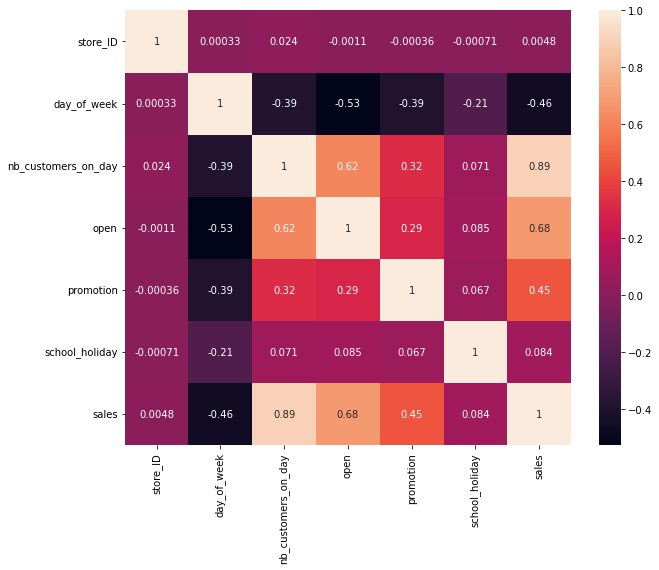

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
validation = validation.drop(['open','store_ID'], axis=1) # unnecessary columns

In [78]:
validation['Day_of_week'] = validation['Day_of_week'].astype('object')

In [79]:
validation['Day_of_week'].dtypes

dtype('O')

In [81]:
validation['month'] = validation['Date'].dt.month

In [82]:
validation['month'].dtypes

dtype('int64')

In [83]:
validation['month'] = validation['month'].astype('object')

In [84]:
validation['month'].dtypes

dtype('O')

In [85]:
validation.dtypes

True_index                      int64
Store_ID                        int64
Day_of_week                    object
Date                   datetime64[ns]
Nb_customers_on_day             int64
Open                            int64
Promotion                       int64
State_holiday                  object
School_holiday                  int64
month                          object
dtype: object

In [86]:
validation['School_holiday'] = validation['School_holiday'].astype('object')

In [87]:
validation['Promotion'] = validation['Promotion'].astype('object')

In [88]:
corr_matrix=validation.corr()   # default
corr_matrix

,True_index,Store_ID,Nb_customers_on_day,Open
True_index,1.000000,0.004524,0.006882,0.005674
Store_ID,0.004524,1.000000,0.026908,0.004148
Nb_customers_on_day,0.006882,0.026908,1.000000,0.614021
Open,0.005674,0.004148,0.614021,1.000000


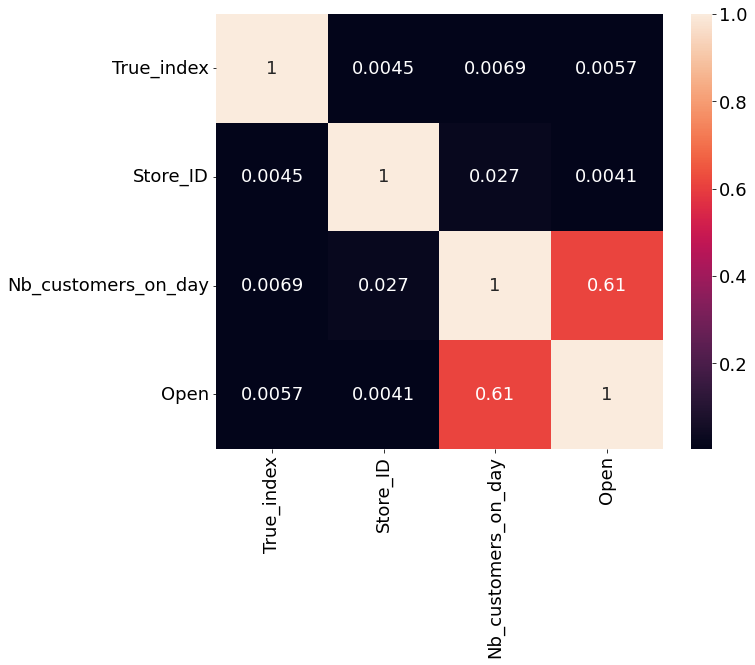

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [90]:
validation = validation.drop(['Store_ID'], axis=1) # unnecessary columns

In [95]:
validation = validation.drop(['Open'], axis=1) # unnecessary columns

In [34]:
# Each year has almost same sales. Therefore, year column is dropped.

In [96]:
validation.dtypes

True_index                      int64
Day_of_week                    object
Date                   datetime64[ns]
Nb_customers_on_day             int64
Promotion                      object
State_holiday                  object
School_holiday                 object
month                          object
dtype: object

In [97]:
true_i = validation[['True_index']]

In [98]:
validation = validation.drop(['True_index'], axis=1)

In [99]:
validation.dtypes

Day_of_week                    object
Date                   datetime64[ns]
Nb_customers_on_day             int64
Promotion                      object
State_holiday                  object
School_holiday                 object
month                          object
dtype: object

### Break into Numerical and Categorical

In [100]:
validation_num = validation.select_dtypes(include = np.number)
validation_cat = validation.select_dtypes(include = object)

### MinMax Scaler

In [101]:
X_norm1 = transformer.transform(validation_num)
X_normalized_scale = pd.DataFrame(X_norm1,columns=validation_num.columns)
X_normalized_scale.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Nb_customers_on_day
Feature names seen at fit time, yet now missing:
- nb_customers_on_day

  warnings.warn(message, FutureWarning)


,Nb_customers_on_day
0,0.000000
1,0.082265
2,0.113961
3,0.057530
4,0.065225


### Onehotencoding

In [102]:
cols = encoder.get_feature_names(input_features=validation_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(validation_cat).toarray(),columns=cols)

X_cat_encode.head(165)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Day_of_week
- Promotion
- School_holiday
- State_holiday
Feature names seen at fit time, yet now missing:
- day_of_week
- promotion
- school_holiday
- state_holiday

  warnings.warn(message, FutureWarning)


,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Promotion_1,State_holiday_a,State_holiday_b,State_holiday_c,School_holiday_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concat scaled numericals and encoded categoricals

In [103]:
validation = pd.concat([X_cat_encode, X_normalized_scale], axis=1)

In [104]:
print('X shape: ', X.shape)

X shape:  (640840, 7)


### Model prediction

In [119]:
predictions_valid = model2.predict(validation)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Day_of_week_2
- Day_of_week_3
- Day_of_week_4
- Day_of_week_5
- Day_of_week_6
- ...
Feature names seen at fit time, yet now missing:
- day_of_week_2
- day_of_week_3
- day_of_week_4
- day_of_week_5
- day_of_week_6
- ...

  warnings.warn(message, FutureWarning)


In [120]:
predictions_valid

array([  -34.86462716,  4414.4830765 ,  5720.67132787, ...,
       14337.77555102,  1382.89738856,  5180.21960326])

In [121]:
prediction = pd.DataFrame(predictions_valid, columns=['predictions_valid'])

In [122]:
prediction

,predictions_valid
0,-34.864627
1,4414.483077
2,5720.671328
3,3515.721854
4,4367.471049
...,...
71200,6758.948511
71201,7371.127451
71202,14337.775551
71203,1382.897389


In [123]:
prediction['True_index'] = true_i['True_index'].values

In [124]:
prediction

,predictions_valid,True_index
0,-34.864627,7
1,4414.483077,19
2,5720.671328,31
3,3515.721854,45
4,4367.471049,56
...,...,...
71200,6758.948511,712004
71201,7371.127451,712018
71202,14337.775551,712020
71203,1382.897389,712023


In [125]:
prediction = prediction[['True_index','predictions_valid']]

In [126]:
prediction

,True_index,predictions_valid
0,7,-34.864627
1,19,4414.483077
2,31,5720.671328
3,45,3515.721854
4,56,4367.471049
...,...,...
71200,712004,6758.948511
71201,712018,7371.127451
71202,712020,14337.775551
71203,712023,1382.897389


In [135]:
prediction.to_csv('prediction.csv')

In [127]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [128]:
predictions_dtr = model1.predict(validation)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Day_of_week_2
- Day_of_week_3
- Day_of_week_4
- Day_of_week_5
- Day_of_week_6
- ...
Feature names seen at fit time, yet now missing:
- day_of_week_2
- day_of_week_3
- day_of_week_4
- day_of_week_5
- day_of_week_6
- ...

  warnings.warn(message, FutureWarning)


In [129]:
predictions_dtr

array([   0. , 4660. , 6771.5, ..., 7851. ,    0. , 3575. ])

In [130]:
model3.fit(X_train,y_train)

KNeighborsRegressor()

In [133]:
# predictions_knr = model3.predict(validation)

In [ ]:
# predictions_knr